<a href="https://colab.research.google.com/github/anshu1910/ML.ai/blob/main/3501_Anshu_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
train=pd.read_csv('/content/Train.csv')

In [5]:
test=pd.read_csv('/content/Test.csv')

In [6]:
train

,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6
...,...,...,...,...,...,...,...,...,...
3127,F,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9
3128,F,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12
3129,M,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11
3130,M,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9


In [7]:
test

,Index,A,B,C,D,E,F,G,H
0,866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1,1483,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
2,599,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
3,1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
4,670,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215
...,...,...,...,...,...,...,...,...,...
1040,532,I,0.470,0.370,0.120,0.4705,0.1845,0.1055,0.155
1041,3417,M,0.580,0.460,0.150,1.0165,0.4910,0.2210,0.265
1042,1505,M,0.635,0.510,0.185,1.3080,0.5440,0.3180,0.377
1043,2245,M,0.460,0.375,0.140,0.5105,0.1920,0.1045,0.205


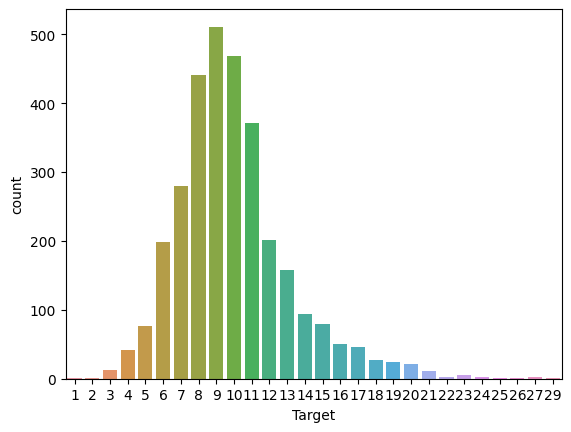

In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(16,6))
# plt.title("barplot showing target values with its frequency")
# plt.xlabel("Target Value")
# plt.ylabel("Frequency")
# sns.barplot(x='target',y='rent',data=train_df)
# plt.show()
import seaborn as sns

ax = sns.countplot(x="Target",data=train)

Text(0, 0.5, 'Target')

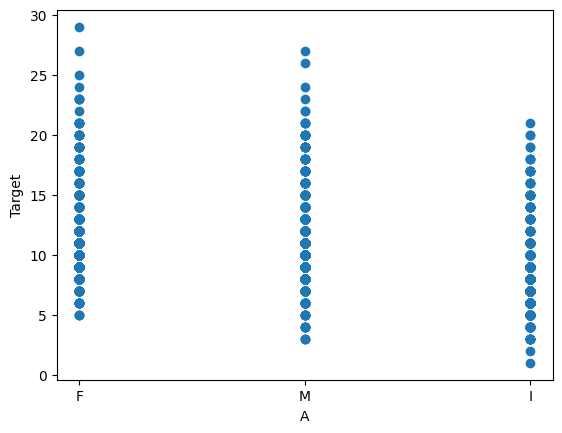

In [10]:
import matplotlib.pyplot as plt
train_df=train
#create scatter plot
plt.scatter(train_df['A'], train_df['Target'])

#add axis labels
plt.xlabel('A')
plt.ylabel('Target')

Text(0, 0.5, 'C')

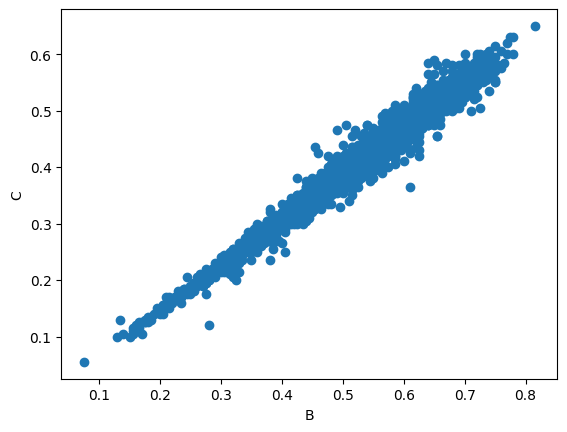

In [12]:
import matplotlib.pyplot as plt

#create scatter plot
plt.scatter(train_df['B'], train_df['C'])

#add axis labels
plt.xlabel('B')
plt.ylabel('C')



Text(0, 0.5, 'Target')

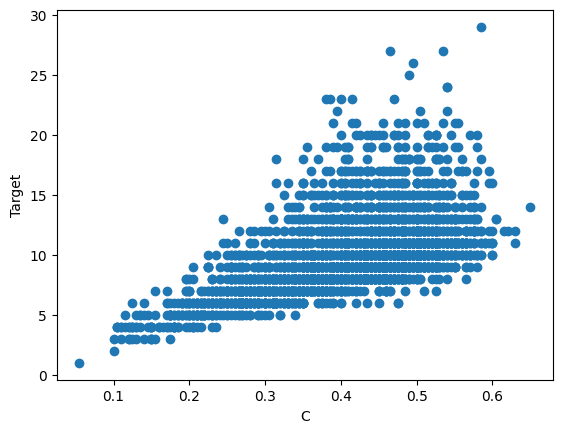

In [13]:
import matplotlib.pyplot as plt

#create scatter plot
plt.scatter(train_df['C'], train_df['Target'])

#add axis labels
plt.xlabel('C')
plt.ylabel('Target')



Text(0, 0.5, 'Target')

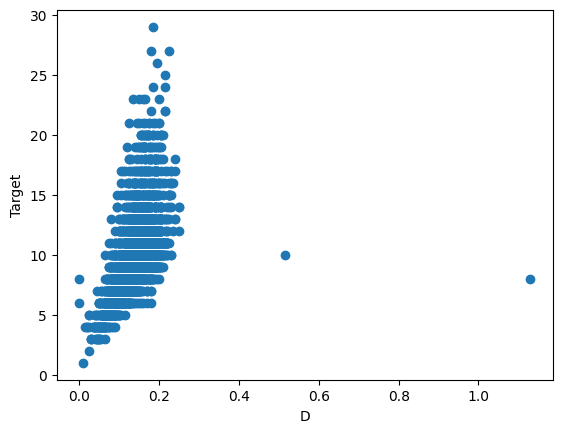

In [14]:
import matplotlib.pyplot as plt

#create scatter plot
plt.scatter(train_df['D'], train_df['Target'])

#add axis labels
plt.xlabel('D')
plt.ylabel('Target')

Text(0, 0.5, 'F')

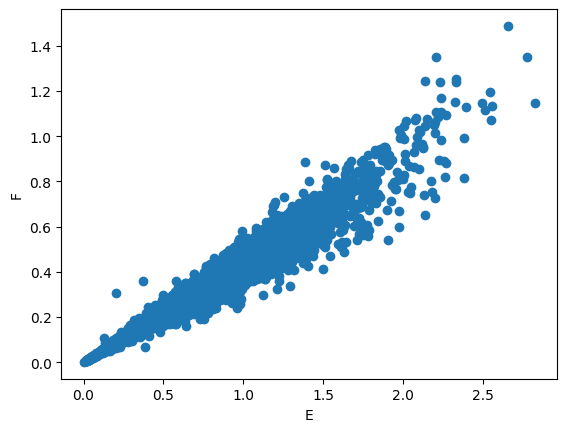

In [15]:
import matplotlib.pyplot as plt

#create scatter plot
plt.scatter(train_df['E'], train_df['F'])

#add axis labels
plt.xlabel('E')
plt.ylabel('F')

Text(0, 0.5, 'G')

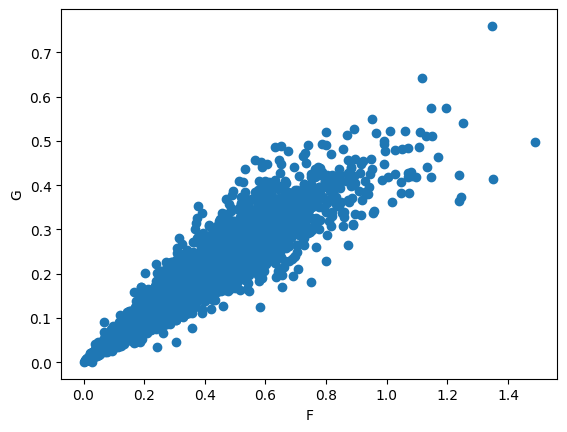

In [17]:
import matplotlib.pyplot as plt

#create scatter plot
plt.scatter(train_df['F'], train_df['G'])

#add axis labels
plt.xlabel('F')
plt.ylabel('G')

Text(0, 0.5, 'Target')

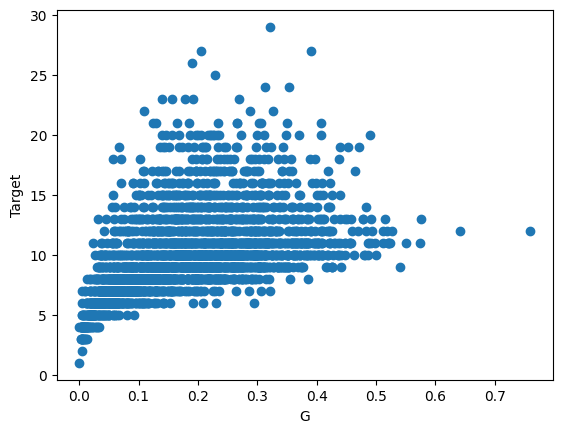

In [18]:
import matplotlib.pyplot as plt

#create scatter plot
plt.scatter(train_df['G'], train_df['Target'])

#add axis labels
plt.xlabel('G')
plt.ylabel('Target')

Text(0, 0.5, 'Target')

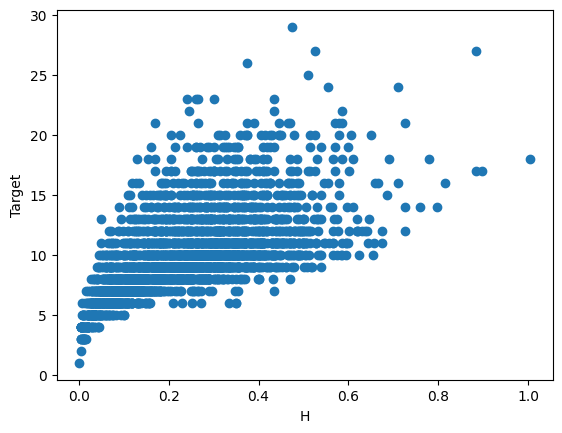

In [19]:
import matplotlib.pyplot as plt

#create scatter plot
plt.scatter(train_df['H'], train_df['Target'])

#add axis labels
plt.xlabel('H')
plt.ylabel('Target')

<ipython-input-20-2f5091787682>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())
<ipython-input-20-2f5091787682>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)


               B         C         D         E         F         G         H  \
B       1.000000  0.987318  0.806793  0.926680  0.901322  0.904783  0.897411   
C       0.987318  1.000000  0.812538  0.926818  0.896775  0.902114  0.904471   
D       0.806793  0.812538  1.000000  0.802041  0.760783  0.782809  0.796733   
E       0.926680  0.926818  0.802041  1.000000  0.970864  0.965888  0.955928   
F       0.901322  0.896775  0.760783  0.970864  1.000000  0.932990  0.884480   
G       0.904783  0.902114  0.782809  0.965888  0.932990  1.000000  0.906051   
H       0.897411  0.904471  0.796733  0.955928  0.884480  0.906051  1.000000   
Target  0.546346  0.563443  0.539061  0.530879  0.412300  0.495972  0.622014   

          Target  
B       0.546346  
C       0.563443  
D       0.539061  
E       0.530879  
F       0.412300  
G       0.495972  
H       0.622014  
Target  1.000000  


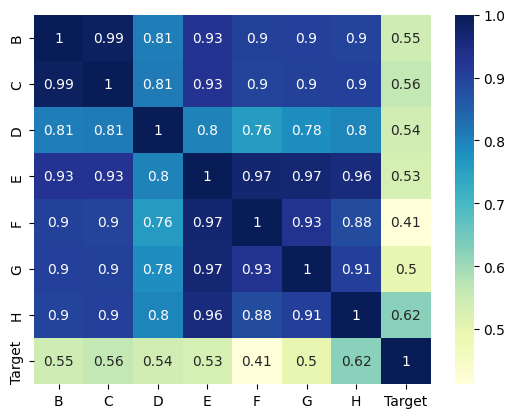

In [20]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

# import file with data
data = train_df

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())

# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_categorical = train.select_dtypes(include=['object'])
X_encoded = X_categorical.apply(le.fit_transform)
X_numeric = train.select_dtypes(exclude=['object'])
X_encoded = pd.concat([X_encoded, X_numeric], axis=1)
train=X_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


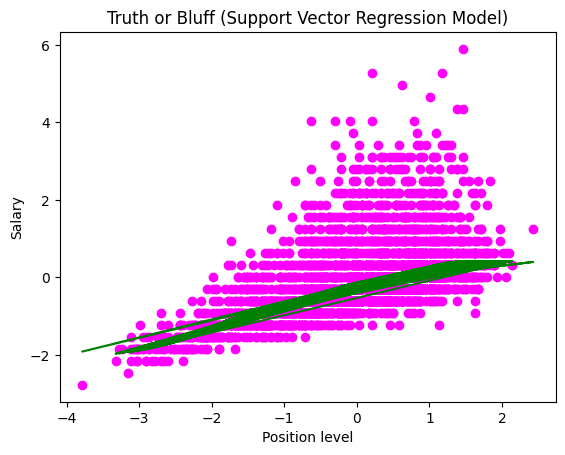

In [23]:
# lr=LinearRegression()
# lr.fit(X_train, y_train)
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the dataset
dataset = pd.read_csv('/content/Train.csv')
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,8:9].values.astype(float)
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
#5 Predicting a new result
# y_pred = regressor.predict([[1.2]])
# y_pred = sc_y.inverse_transform ((regressor.predict (sc_X.transform(np.array([[6.5]])))))

#6 Visualising the Support Vector Regression results
plt.scatter(X, y, color = 'magenta')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [22]:
## Label encoding column A of our dataset
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
train_df['A']= label_encoder.fit_transform(train_df['A'])

train_df['A'].unique()
X=train.drop(['Target', 'H', 'A'],axis=1)
y=train['Target']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [29]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from xgboost import XGBRegressor


from sklearn.metrics import mean_squared_error
from sklearn.base import clone

# Instantiate the models
rf_reg = RandomForestRegressor(random_state=42)
ransac = linear_model.RANSACRegressor()

cat_reg = CatBoostRegressor(random_state=42, verbose=0)
lgbm_reg = LGBMRegressor(random_state=42)
knn_reg = KNeighborsRegressor(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
svr_reg = SVR()




# Train the models
rf_reg.fit(X_train, y_train)

cat_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
knn_reg.fit(X_train, y_train)
svr_reg.fit(X_train, y_train)
ransac.fit(X_train, y_train)


# Make predictions on the test set
rf_pred = rf_reg.predict(X_test)
ran_pred = ransac.predict(X_test)
cat_pred = cat_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)
knn_pred = knn_reg.predict(X_test)
svr_pred = svr_reg.predict(X_test)



# Calculate the mean squared error for each model
rf_mse = mean_squared_error(y_test, rf_pred)
ran_mse = mean_squared_error(y_test, ran_pred)
cat_mse = mean_squared_error(y_test, cat_pred)
lgbm_mse = mean_squared_error(y_test, lgbm_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
svr_mse = mean_squared_error(y_test, svr_pred)


print("Random Forest Regressor MSE: {:.4f}".format(rf_mse))

print("CatBoost Regressor MSE: {:.4f}".format(cat_mse))
print("LightGBM Regressor MSE: {:.4f}".format(lgbm_mse))
print("RAN Regressor MSE: {:.4f}".format(ran_mse))
print("KNN Regressor MSE: {:.4f}".format(knn_mse))
print("SVR Regressor MSE: {:.4f}".format(svr_mse))



# Create an ensemble of the four models
ensemble = [clone(rf_reg), clone(cat_reg), clone(lgbm_reg), clone(knn_reg), clone(svr_reg), clone(ransac)]
for model in ensemble:
    model.fit(X_train, y_train)

# Make predictions using the ensemble
ensemble_pred = [model.predict(X_test) for model in ensemble]
ensemble_pred = sum(ensemble_pred) / len(ensemble_pred)

# Calculate the mean squared error for the ensemble
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
print("Ensemble MSE: {:.4f}".format(ensemble_mse))



<ipython-input-30-6104d1ecc1af>:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest Regressor MSE: 0.6503
CatBoost Regressor MSE: 0.6492
LightGBM Regressor MSE: 0.6510
RAN Regressor MSE: 0.7870
KNN Regressor MSE: 0.8929
SVR Regressor MSE: 0.6977


<ipython-input-30-6104d1ecc1af>:68: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [31]:
X_categorical = test.select_dtypes(include=['object'])
X_encoded = X_categorical.apply(le.fit_transform)
X_numeric = test.select_dtypes(exclude=['object'])
X_encoded = pd.concat([X_encoded, X_numeric], axis=1)
test=X_encoded

In [32]:
test=test.drop(['Index', 'H', 'A'],axis=1)

In [33]:
y_pred=cat_reg.predict(test)

In [34]:
ensemble_pred = [model.predict(test) for model in ensemble]
ensemble_pred = sum(ensemble_pred) / len(ensemble_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: ignored

In [35]:
df=pd.read_csv('/content/drive/MyDrive/practice-hackathon/Test.csv')
df['Target']=ensemble_pred
od=df[['Index','Target']]
od

FileNotFoundError: ignored

In [36]:
od.to_csv('submission.csv',index=False)

NameError: ignored

In [37]:
from google.colab import files
files.download('submission.csv')

FileNotFoundError: ignored